In [19]:
#mengimport library yang diperlukan

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
#mendownload datasets dari dicoding academy (zip file)

!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2020-07-05 09:02:02--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.53MB/s    in 21s     

2020-07-05 09:02:24 (14.5 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [21]:
#menekstrak datasets yang telah didownload ke folder 'tmp'

import os,zipfile

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [22]:
#folder dataset

_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [23]:
#membuat augmentasi dengan fungsi 'ImageDataGenerator'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2,
    shear_range = 0.2,
    fill_mode='wrap',
    zoom_range=0.2,
    rotation_range=90  
  )

In [24]:
#menerapkan augmentasi ke folder dataset

train_generator = train_datagen.flow_from_directory(
       _dir,  
       target_size=(130, 130), 
       class_mode='categorical',
       subset = 'training',
    )

validation_generator = train_datagen.flow_from_directory(
       _dir,  
       target_size=(130, 130), 
       class_mode='categorical',
       subset='validation',
    )

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [25]:
#membuat CNN dengan 7 layer dan menggunakan fungsi 'Dropout' untuk meminimalisir model mengalami overfit

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(130, 130, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

In [26]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
#mengatur 'callbacks' juga untuk meminimalisir model overfit atau underfit dan mengurangi jumlah epoch

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(
    monitor='accuracy',
    mode='max',
    patience=4,
    verbose=1
     )

In [28]:
#pelatihan model

latih = model.fit(
               train_generator,
               steps_per_epoch=50,  
               epochs=50,
               validation_data = validation_generator,
               validation_steps=5,
               callbacks=[es],
               verbose=2,
        )

print('berhenti pada epoch ke', len(latih.history['accuracy']))

Epoch 1/50
50/50 - 37s - loss: 1.0886 - accuracy: 0.3913 - val_loss: 1.0216 - val_accuracy: 0.5875
Epoch 2/50
50/50 - 36s - loss: 0.9152 - accuracy: 0.5544 - val_loss: 0.9273 - val_accuracy: 0.5562
Epoch 3/50
50/50 - 36s - loss: 0.6772 - accuracy: 0.7442 - val_loss: 0.8961 - val_accuracy: 0.6313
Epoch 4/50
50/50 - 36s - loss: 0.4955 - accuracy: 0.8290 - val_loss: 0.6858 - val_accuracy: 0.7250
Epoch 5/50
50/50 - 36s - loss: 0.4009 - accuracy: 0.8661 - val_loss: 0.2841 - val_accuracy: 0.9250
Epoch 6/50
50/50 - 37s - loss: 0.3075 - accuracy: 0.8988 - val_loss: 0.4480 - val_accuracy: 0.8375
Epoch 7/50
50/50 - 40s - loss: 0.2527 - accuracy: 0.9221 - val_loss: 0.1842 - val_accuracy: 0.9438
Epoch 8/50
50/50 - 36s - loss: 0.2472 - accuracy: 0.9214 - val_loss: 0.2257 - val_accuracy: 0.9312
Epoch 9/50
50/50 - 37s - loss: 0.1990 - accuracy: 0.9371 - val_loss: 0.1688 - val_accuracy: 0.9625
Epoch 10/50
50/50 - 36s - loss: 0.2218 - accuracy: 0.9221 - val_loss: 0.1297 - val_accuracy: 0.9563
Epoch 11/

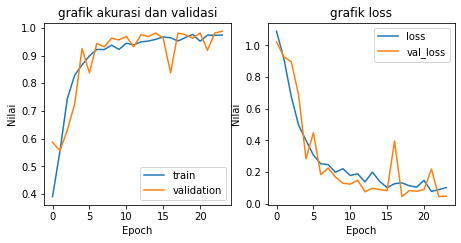

In [29]:
#menampilkan hasil pelatihan tiap epoch dalam grafik garis

import matplotlib.pyplot as plt

plt.figure(figsize=(200,200))
plt.subplot(50,50,1)
plt.plot(latih.history['accuracy'], label='train')
plt.plot(latih.history['val_accuracy'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Nilai')
plt.title('grafik akurasi dan validasi')
plt.legend()
plt.subplot(50,50,2)
plt.plot(latih.history['loss'], label='loss')
plt.plot(latih.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Nilai')
plt.title('grafik loss')
plt.legend()
plt.show()

In [30]:
print('accuracy akhir=',latih.history['accuracy'][-1])
print('val_acc akhir=',latih.history['val_accuracy'][-1])

accuracy akhir= 0.9736015200614929
val_acc akhir= 0.987500011920929


Saving AfvIbTwxuG0q7Ij1.png to AfvIbTwxuG0q7Ij1.png
Saving Jgjf4Q4LunuuLJKq.png to Jgjf4Q4LunuuLJKq.png
Saving QUqw1jotp4mOm1ZY.png to QUqw1jotp4mOm1ZY.png
Saving WhatsApp Image 2020-07-02 at 18.45.37(2).jpeg to WhatsApp Image 2020-07-02 at 18.45.37(2).jpeg
Saving WhatsApp Image 2020-07-02 at 18.45.37.jpeg to WhatsApp Image 2020-07-02 at 18.45.37.jpeg
Saving WhatsApp Image 2020-07-03 at 20.03.19.jpeg to WhatsApp Image 2020-07-03 at 20.03.19.jpeg


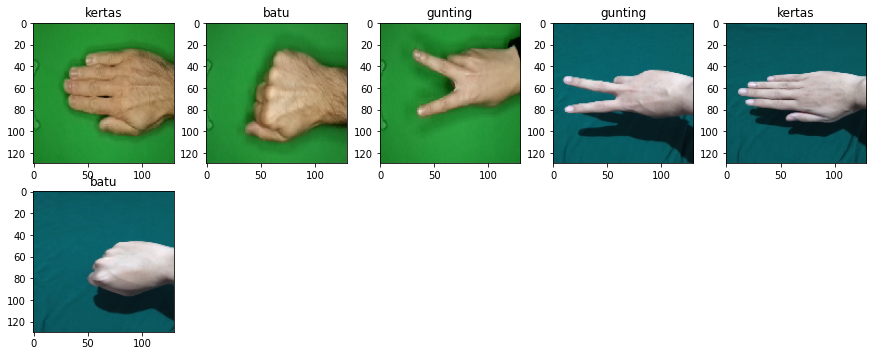

In [32]:
#melakukan prediksi

import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg

%matplotlib inline
label = ''
i = 1
uploaded = files.upload()
#print(len(uploaded))

fig = plt.figure(figsize=(15,15))

for fn in uploaded.keys():
   
   path = fn 
   img = image.load_img(path, target_size=(130,130))
   
   x = image.img_to_array(img)
   x = np.expand_dims(x, axis=0)
  

   images = np.vstack([x])
   classes = model.predict(images, batch_size=10)
   #print(classes)
      
   if classes[0][0] == 1:
      label = 'kertas'
   elif classes[0][1] == 1:
      label = 'batu'
   else:
      label = 'gunting'
     
  
   fig.add_subplot(5,5,i)
   plt.imshow(img)
   plt.title(label)
   i += 1

plt.show()      